In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
import sounddevice as sd
import soundfile   as sf


In [17]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

In [18]:
def LPF(signal, cutoff_hz, fs):
        from scipy import signal as sg
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 60.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return( sg.lfilter(taps, 1.0, signal))

In [45]:
fs = 44100
duration = 2
sd.default.samplerate = fs
sd.default.channels = 1
audio, samplerate = sf.read('sound.wav')
samplesAudio = len(audio)
myrecording = sd.playrec(audio, fs, channels=2)

In [46]:
sd.play(myrecording[:,0])
# print(myrecording)

(2500, 20000)

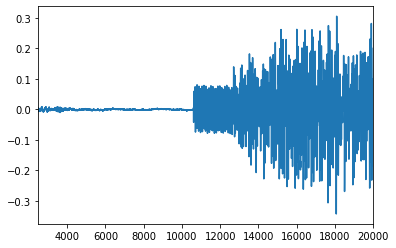

In [47]:
plt.figure()
plt.plot(myrecording[:,0])
plt.xlim(2500,20000)

(-1500, 2000)

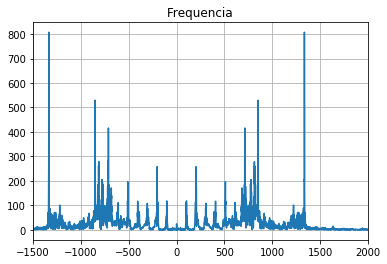

In [48]:
X, Y = calcFFT(myrecording[:,0], samplerate)
plt.figure("Fourier Audio")
plt.plot(X, np.abs(Y))
plt.grid()
plt.title('Frequencia')
plt.xlim(-1500,2000)

In [50]:
import peakutils
index = peakutils.indexes(np.abs(Y), thres=0.3, min_dist=50)
print("index de picos {}" .format(index))
picos = []
for freq in X[index]:
    print("freq de pico sao {}" .format(freq))
    if freq >0:
        picos.append(freq)

index de picos [20714 21198 21337 21847 22253 22763 22902 23386]
freq de pico sao -1335.530284133427
freq de pico sao -851.5193088278647
freq de pico sao -712.516156828955
freq de pico sao -202.50459194086216
freq de pico sao 203.50461461711166
freq de pico sao 713.5161795052045
freq de pico sao 852.5193315041142
freq de pico sao 1336.5303068096764


In [34]:
freq = {}
freq['1'] = [697,1209]
freq['2'] = [697,1336]
freq['3'] = [697,1477]
freq['A'] = [697,1633]
freq['4'] = [770,1209]
freq['5'] = [770,1336]
freq['6'] = [770,1477]
freq['B'] = [770,1633]
freq['7'] = [852,1209]
freq['8'] = [852,1336]
freq['9'] = [852,1477]
freq['C'] = [852,1633]
freq['X'] = [941,1209]
freq['0'] = [941,1336]
freq['#'] = [941,1477]
freq['D'] = [941,1633]

for numero,frequencias in freq.items():
    if frequencias[0]+1 > picos[0] and frequencias[0]-1 < picos[0]:
        if frequencias[1]+1 > picos[1] and frequencias[1]-1 < picos[1]:
            print("O numero era: ",numero)

O numero era:  8
